   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


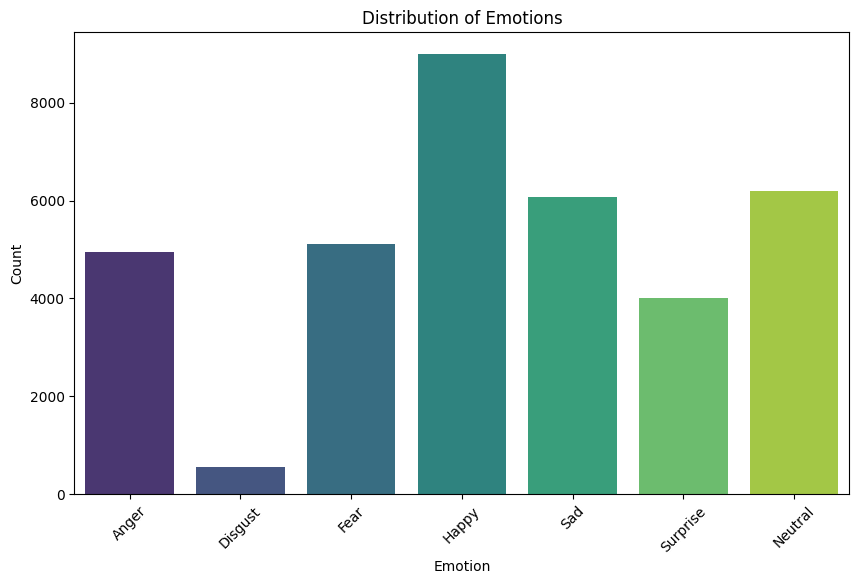

In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Constants
DATA_INPUT_PATH = '/kaggle/input/fer2013/fer2013.csv'
UTKFACE_PATH = '/kaggle/input/utkface-new/UTKFace/'
IMAGE_SIZE = 48
AGE_GENDER_IMAGE_SIZE = 128
CLASS_LABELS = [0, 1, 2, 3, 4, 5, 6]
CLASS_NAMES = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
BATCH_SIZE = 32
EPOCHS = 50
MODEL_OUTPUT_PATH = '/kaggle/working/'  # Save models in the current working directory

# Create output directory if it doesn't exist
os.makedirs(MODEL_OUTPUT_PATH, exist_ok=True)

# Load and visualize the FER2013 dataset
df = pd.read_csv(DATA_INPUT_PATH)
print(df.head())
print(df['emotion'].value_counts())

# Plot the distribution of emotions
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df, palette='viridis')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(ticks=range(len(CLASS_NAMES)), labels=CLASS_NAMES, rotation=45)
plt.show()


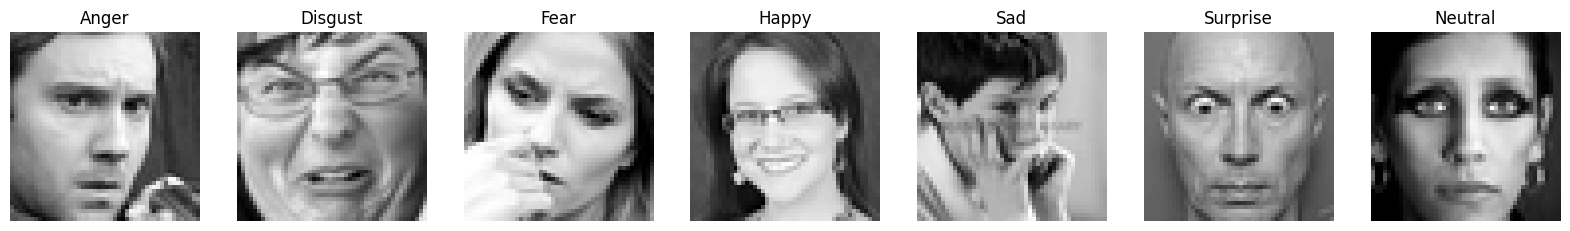

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,403,399 (9.17 MB)

 Trainable params: 2,401,351 (9.16 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [2]:
# Preprocess the pixel data
def preprocess_pixels(pixel_data):
    if isinstance(pixel_data, str):
        pixels = np.array(pixel_data.split(), dtype=int)
    else:
        pixels = np.array(pixel_data, dtype=int)
    return pixels.reshape(IMAGE_SIZE, IMAGE_SIZE, 1)

# Apply preprocessing
df['pixels'] = df['pixels'].apply(preprocess_pixels)

# Plot examples of each emotion
plt.figure(figsize=(20, 20))
for i, emotion in enumerate(CLASS_NAMES):
    img = df[df['emotion'] == i]['pixels'].iloc[0].reshape(IMAGE_SIZE, IMAGE_SIZE)
    plt.subplot(1, len(CLASS_NAMES), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.show()

# Split the data into training and testing sets
train_df = df[df['Usage'] == 'Training']
test_df = df[df['Usage'] == 'PublicTest']

# Separate features and labels
X_train = np.array(train_df['pixels'].tolist())
y_train = tf.keras.utils.to_categorical(train_df['emotion'], num_classes=len(CLASS_LABELS))
X_test = np.array(test_df['pixels'].tolist())
y_test = tf.keras.utils.to_categorical(test_df['emotion'], num_classes=len(CLASS_LABELS))

# Build the emotion recognition model with Input layer
def build_emotion_model():
    model = models.Sequential([
        layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
        layers.Conv2D(64, (5, 5), activation='elu', padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (5, 5), activation='elu', padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(128, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(256, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='elu', padding='same', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='elu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='elu', kernel_initializer='he_normal'),
        layers.Dropout(0.3),
        layers.Dense(len(CLASS_LABELS), activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build the model
emotion_model = build_emotion_model()
emotion_model.summary()

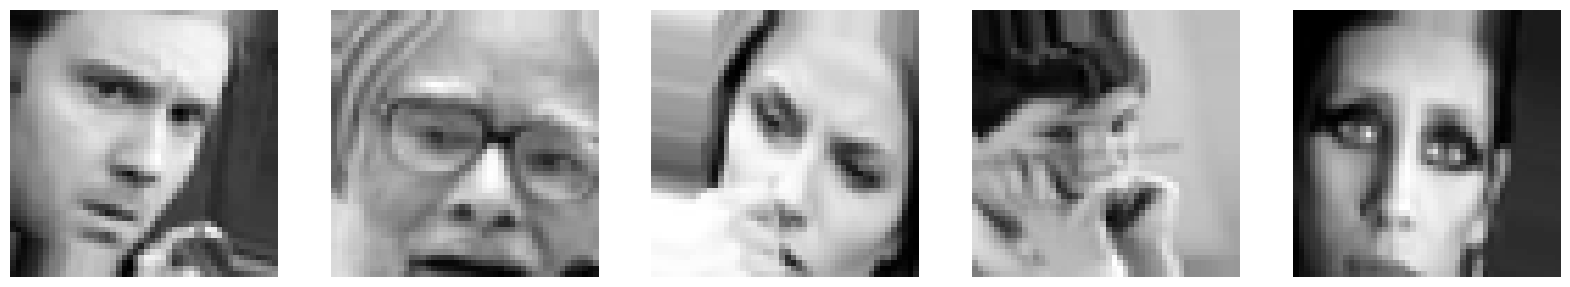

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 42s 31ms/step - accuracy: 0.2299 - loss: 2.0349 - val_accuracy: 0.3429 - val_loss: 1.6704
Epoch 2/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.3750 - loss: 1.5387

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.3750 - loss: 1.5387 - val_accuracy: 0.2000 - val_loss: 1.6286
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.3427 - loss: 1.6592 - val_accuracy: 0.4470 - val_loss: 1.4036
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 0.3125 - loss: 1.7293 - val_accuracy: 0.2000 - val_loss: 1.7084
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4402 - loss: 1.4554 - val_accuracy: 0.5209 - val_loss: 1.2491
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 15us/step - accuracy: 0.5000 - loss: 1.4100 - val_accuracy: 0.8000 - val_loss: 0.7376
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.4840 - loss: 1.3476 - val_accuracy: 0.5187 - val_loss: 1.2589
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.4375 - loss: 1.3502 - val_accuracy: 0.4000 - val_loss: 1.8097
Epoch 9/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.5098 - loss: 1.2853 - val_accuracy: 

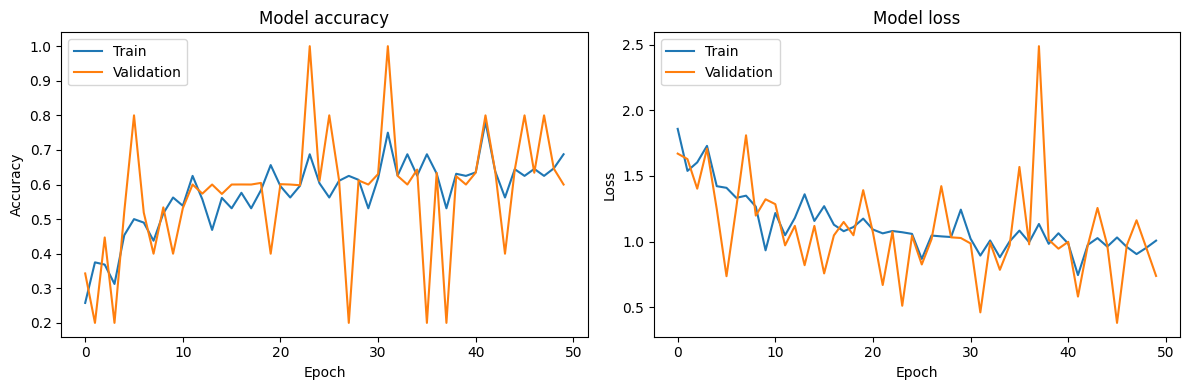

In [3]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)
steps_per_epoch = len(X_train) // BATCH_SIZE
validation_steps = len(X_test) // BATCH_SIZE

train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
test_generator = test_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE)


# Visualize augmented images
augmented_images = [train_datagen.random_transform(x) for x in X_train[:5]]
plt.figure(figsize=(20, 20))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img.reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.axis('off')
plt.show()

# Train the model
history = emotion_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=test_generator,
    validation_steps=validation_steps
)

test_loss, test_acc = emotion_model.evaluate(test_generator, steps=validation_steps)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the model
emotion_model.save(os.path.join(MODEL_OUTPUT_PATH, 'emotion_model.h5'))


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


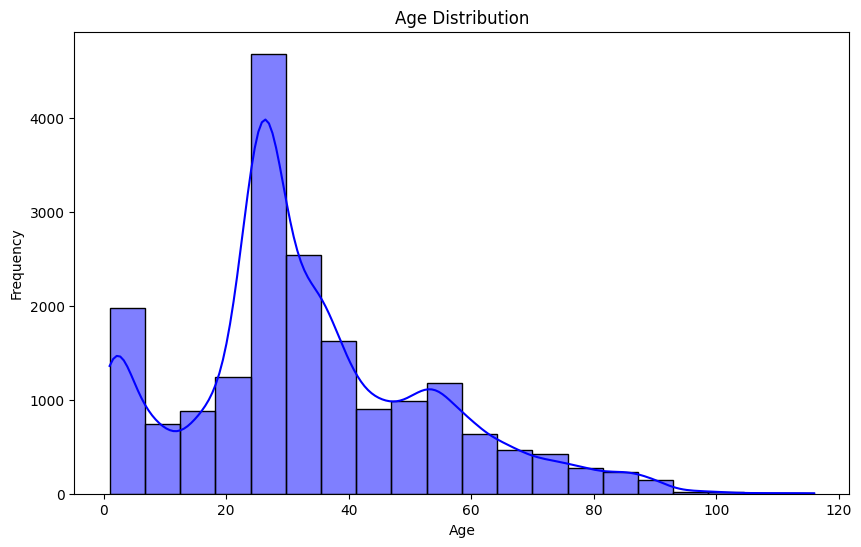

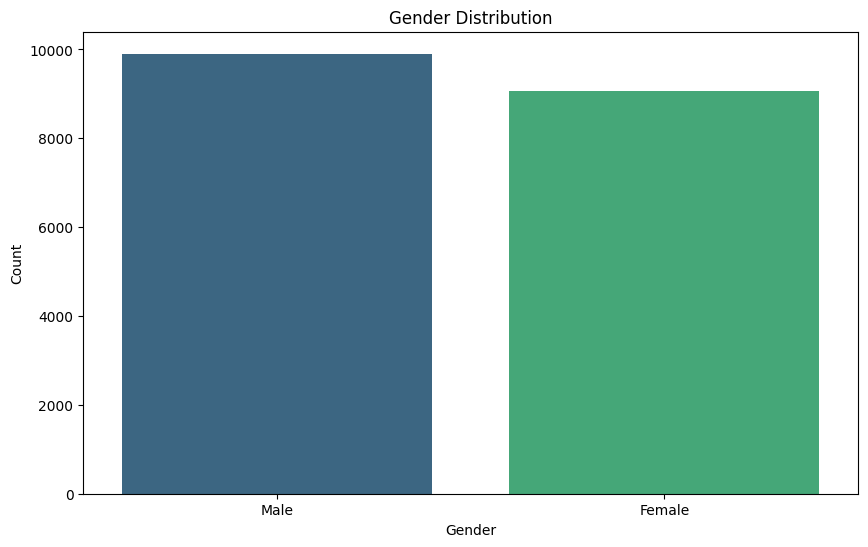

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - loss: 18.7572 - mae: 18.7572 - r2_score: -0.5789 - val_loss: 11.4389 - val_mae: 11.4389 - val_r2_score: 0.3842
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 11.4835 - mae: 11.4835 - r2_score: 0.4018 - val_loss: 10.3553 - val_mae: 10.3553 - val_r2_score: 0.5017
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 10.8011 - mae: 10.8011 - r2_score: 0.4791 - val_loss: 9.9521 - val_mae: 9.9521 - val_r2_score: 0.5412
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 10.3795 - mae: 10.3795 - r2_score: 0.5250 - val_loss: 9.7196 - val_mae: 9.7196 - val_r2_score: 0.5691
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 10.0225 - mae: 10.0225 - r2_score: 0.5481 - val_loss: 9.5331 - val_mae: 9.5331 - val_r2_score: 0.5719
Epoch 6/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 9.8100 - mae: 9.8100 - r2_score: 0.5586 - val_loss: 9.3606 - val_mae: 9.3606 - val_r2_score: 0.5862
Epoch 7/100


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.6972 - loss: 0.5817 - val_accuracy: 0.8015 - val_loss: 0.4300
Epoch 2/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7989 - loss: 0.4356 - val_accuracy: 0.8163 - val_loss: 0.3992
Epoch 3/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8141 - loss: 0.4031 - val_accuracy: 0.8239 - val_loss: 0.3836
Epoch 4/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8235 - loss: 0.3869 - val_accuracy: 0.8266 - val_loss: 0.3751
Epoch 5/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8319 - loss: 0.3704 - val_accuracy: 0.8321 - val_loss: 0.3643
Epoch 6/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8365 - loss: 0.3610 - val_accuracy: 0.8353 - val_loss: 0.3576
Epoch 7/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8477 - loss: 0.3460 - val_accuracy: 0.8370 - val_loss: 0.3554
Epoch 8/100
297/297 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8480 - loss: 0.3400 -

In [4]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Constants
UTKFACE_PATH = '/kaggle/input/utkface-new/UTKFace/'
AGE_GENDER_IMAGE_SIZE = 128

# Load and preprocess the UTKFace dataset
x = []  # Normalized input
y_age = []  # Output (age)
y_gender = []  # Output (gender)

for file in os.listdir(UTKFACE_PATH):
    if file.endswith(('.jpg', '.png', '.jpeg')):
        parts = file.split('_')
        if len(parts) == 4:  # Ensure the filename has the expected format
            age, gender, _, _ = parts
            age = int(age)
            gender = int(gender)

            # Resize to 128x128 and normalize
            image = Image.open(os.path.join(UTKFACE_PATH, file))
            image = image.convert('RGB').resize((AGE_GENDER_IMAGE_SIZE, AGE_GENDER_IMAGE_SIZE))
            x.append(np.array(image))

            # Append age and gender labels
            y_age.append(age)
            y_gender.append(gender)

# Normalize
x = np.array(x, dtype=np.float32) / 255.0
y_age = np.array(y_age, dtype=np.int32)
y_gender = np.array(y_gender, dtype=np.int32)

# Split the data
x_train, x_test, y_age_train, y_age_test = train_test_split(x, y_age, test_size=0.2, random_state=42, shuffle=True)
_, _, y_gender_train, y_gender_test = train_test_split(x, y_gender, test_size=0.2, random_state=42, shuffle=True)

# Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_age_train, bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_gender_train, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# Build the age detection model using MobileNetV2
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(AGE_GENDER_IMAGE_SIZE, AGE_GENDER_IMAGE_SIZE, 3))
base_model.trainable = False  # Freeze base layers

age_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')  # Regression output
])

age_model.compile(optimizer=Adam(learning_rate=1e-4), loss='mae', metrics=['mae', 'r2_score'])
age_model.summary()

# Train the age model
age_model.fit(x_train, y_age_train, epochs=100, batch_size=64, validation_data=(x_test, y_age_test), verbose=1)

# Save the age model
age_model.save('/kaggle/working/age_model.h5')

# Build the gender detection model
gender_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

gender_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
gender_model.summary()

# Train the gender model
gender_model.fit(x_train, y_gender_train, epochs=100, batch_size=64, validation_data=(x_test, y_gender_test), verbose=1)

# Save the gender model
gender_model.save('/kaggle/working/gender_model.h5')